# Unemployment Rate and EI Claims

## Import Unemployment Data and EI Claims information from Statistics Canada

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [2]:
# Read the downloaded  file by its local path , and assign it to variable "df"
df = pd.read_csv(r"C:\Users\e78202\Desktop\projects\Coursera_Capstone\EI_Ontario.csv", header= 0)
df

,Year,Month,Quarter,Year_Month,Year_Quarter,Date,Total unemployed,Future job starter,On temporary layoff,Looked for full-time work,Looked for part-time work,EI Claim Counts
0,2010,2,1,20102,2010Q1,2/1/2010,639.9,9.3,39.3,467.5,123.9,72110.0
1,2010,3,1,20103,2010Q1,3/1/2010,674.3,23.5,47.0,466.5,137.2,73930.0
2,2010,4,2,20104,2010Q2,4/1/2010,627.8,21.4,21.1,457.6,127.8,75840.0
3,2010,5,2,20105,2010Q2,5/1/2010,675.3,20.7,16.5,484.6,153.5,75900.0
4,2010,6,2,20106,2010Q2,6/1/2010,601.1,21.3,16.2,440.0,123.6,77350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2019,11,4,201911,2019Q4,11/1/2019,396.1,9.3,10.4,273.1,103.4,77930.0
117,2019,12,4,201912,2019Q4,12/1/2019,372.2,13.6,18.6,251.2,88.8,75800.0
118,2020,1,1,20201,2020Q1,1/1/2020,412.4,15.2,26.0,255.1,116.1,76970.0
119,2020,2,1,20202,2020Q1,2/1/2020,434.5,6.6,19.6,295.7,112.6,77310.0


## Calculate Historical Average of Unemployment by type and Compare March 2020 results with the Historical Average

### Data Grouping and Arranging

In [3]:
group=df['Year']<2020
df_year=df[group]
mean_tot=df['Total unemployed'].mean()
mean_starter=df['Future job starter'].mean()
mean_temp=df['On temporary layoff'].mean()
mean_full=df['Looked for full-time work'].mean()
mean_part=df['Looked for part-time work'].mean()
list=[mean_starter,df.iloc[120,7],mean_temp,df.iloc[120,8],mean_full,df.iloc[120,9],mean_part,df.iloc[120,10]]
list

[18.283471074380166,
 20.4,
 20.01570247933884,
 197.1,
 349.06611570247924,
 289.4,
 129.59008264462807,
 107.0]

In [4]:
df=pd.DataFrame(np.array(list).reshape(4,2),columns=['Historical Average','2020Mar'])
df['Type']=['Future job starter', 'On temporary layoff','Looked for full-time work','Looked for part-time work']
df.set_index('Type', inplace= True)
df

,Historical Average,2020Mar
Type,,
Future job starter,18.283471,20.4
On temporary layoff,20.015702,197.1
Looked for full-time work,349.066116,289.4
Looked for part-time work,129.590083,107.0


### Bar Chart for Comparison

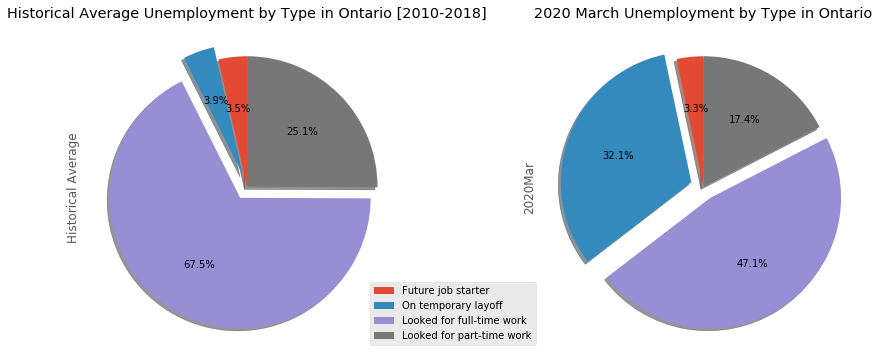

In [5]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

#Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.
explode_list=[0,0.1,0.1,0]
# autopct create %, start angle represent starting point
df['Historical Average'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow  
                            labels=None,
                            explode=explode_list,
                            ax=ax0
                            
                            )

ax0.set_title('Historical Average Unemployment by Type in Ontario [2010-2018]')

# add legend
#ax0.legend(labels=df.index, loc='upper left')


#Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.
explode_list=[0,0.1,0.1,0]
# autopct create %, start angle represent starting point
df['2020Mar'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow  
                            labels=None,
                            explode=explode_list,
                            ax=ax1
                            
                            )

ax1.set_title('2020 March Unemployment by Type in Ontario')

# add legend and place in the middle
ax1.legend(labels=df.index, loc='lower right',bbox_to_anchor=(0,0))
plt.show()

## Trend Analysis and Regression Modelling

In [6]:
# Read the downloaded  file by its local path , and assign it to variable "df"
df = pd.read_csv(r"C:\Users\e78202\Desktop\projects\Coursera_Capstone\EI_Ontario.csv", header= 0)
df

,Year,Month,Quarter,Year_Month,Year_Quarter,Date,Total unemployed,Future job starter,On temporary layoff,Looked for full-time work,Looked for part-time work,EI Claim Counts
0,2010,2,1,20102,2010Q1,2/1/2010,639.9,9.3,39.3,467.5,123.9,72110.0
1,2010,3,1,20103,2010Q1,3/1/2010,674.3,23.5,47.0,466.5,137.2,73930.0
2,2010,4,2,20104,2010Q2,4/1/2010,627.8,21.4,21.1,457.6,127.8,75840.0
3,2010,5,2,20105,2010Q2,5/1/2010,675.3,20.7,16.5,484.6,153.5,75900.0
4,2010,6,2,20106,2010Q2,6/1/2010,601.1,21.3,16.2,440.0,123.6,77350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2019,11,4,201911,2019Q4,11/1/2019,396.1,9.3,10.4,273.1,103.4,77930.0
117,2019,12,4,201912,2019Q4,12/1/2019,372.2,13.6,18.6,251.2,88.8,75800.0
118,2020,1,1,20201,2020Q1,1/1/2020,412.4,15.2,26.0,255.1,116.1,76970.0
119,2020,2,1,20202,2020Q1,2/1/2020,434.5,6.6,19.6,295.7,112.6,77310.0


In [7]:
df_year=df[['Year_Month','Total unemployed','EI Claim Counts']]
df_year['Year_Month']=df['Year_Month'].apply(str)
df_year.set_index('Year_Month', inplace=True)
df_year.index.name = None
mean_tot=df['Total unemployed'].mean()
std_tot=df['Total unemployed'].std()
df_year['Unemployed_normalized']=(df_year['Total unemployed']-mean_tot)/std_tot
mean_claim=df['EI Claim Counts'].mean()
std_claim=df['EI Claim Counts'].std()
df_year['EI claim counts_normalized']=(df_year['EI Claim Counts']-mean_claim)/mean_claim
df_year.drop(['Total unemployed','EI Claim Counts'],axis=1,inplace=True)
df_year

C:\Users\e78202\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\e78202\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\e78202\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,Unemployed_normalized,EI claim counts_normalized
20102,1.589553,-0.024648
20103,2.034323,-0.000030
20104,1.433108,0.025804
20105,2.047252,0.026616
20106,1.087894,0.046228
...,...,...
201911,-1.562626,0.054073
201912,-1.871638,0.025263
20201,-1.351877,0.041088
20202,-1.066138,0.045687


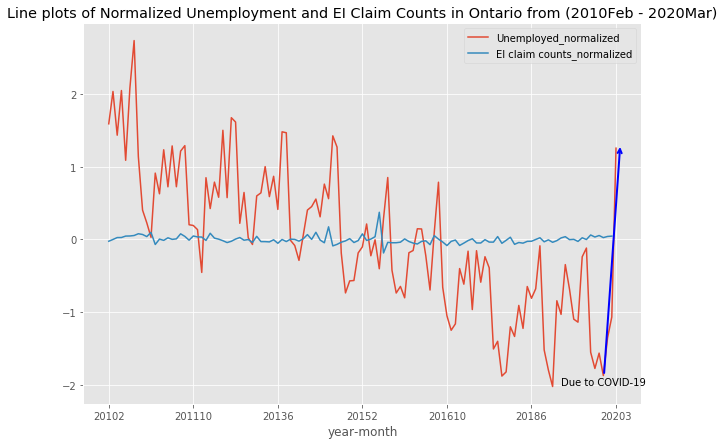

In [8]:
# horizontal box plots
df_year.plot(kind='line', figsize=(10, 7))

plt.title('Line plots of Normalized Unemployment and EI Claim Counts in Ontario from (2010Feb - 2020Mar)')
plt.xlabel('year-month')

#Annotate arrow
plt.annotate('Due to COVID-19',                      # s: str. Will leave it blank for no text
             xy=(121, 1.3),             # place head of the arrow at point 
             xytext=(107, -2),         # place base of the arrow at point
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

In [9]:
reg=df['Year_Month'] !=20203
max=df['Year_Month'] !=20156
min=df['Year_Month'] !=20157
df_reg=df[reg&max&min]
x = df_reg['Total unemployed']      
y = df_reg['EI Claim Counts']     
fit = np.polyfit(x, y, deg=2)
fit


array([ 1.41987282e-02, -8.29237416e+00,  7.42266224e+04])

In [10]:
df_reg

,Year,Month,Quarter,Year_Month,Year_Quarter,Date,Total unemployed,Future job starter,On temporary layoff,Looked for full-time work,Looked for part-time work,EI Claim Counts
0,2010,2,1,20102,2010Q1,2/1/2010,639.9,9.3,39.3,467.5,123.9,72110.0
1,2010,3,1,20103,2010Q1,3/1/2010,674.3,23.5,47.0,466.5,137.2,73930.0
2,2010,4,2,20104,2010Q2,4/1/2010,627.8,21.4,21.1,457.6,127.8,75840.0
3,2010,5,2,20105,2010Q2,5/1/2010,675.3,20.7,16.5,484.6,153.5,75900.0
4,2010,6,2,20106,2010Q2,6/1/2010,601.1,21.3,16.2,440.0,123.6,77350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019,10,4,201910,2019Q4,10/1/2019,379.8,10.9,10.0,254.5,104.4,76390.0
116,2019,11,4,201911,2019Q4,11/1/2019,396.1,9.3,10.4,273.1,103.4,77930.0
117,2019,12,4,201912,2019Q4,12/1/2019,372.2,13.6,18.6,251.2,88.8,75800.0
118,2020,1,1,20201,2020Q1,1/1/2020,412.4,15.2,26.0,255.1,116.1,76970.0


'EI Claim Counts = 0.01 * Total Unemployed^2+ -8.3 * Total Unemployed+74227'

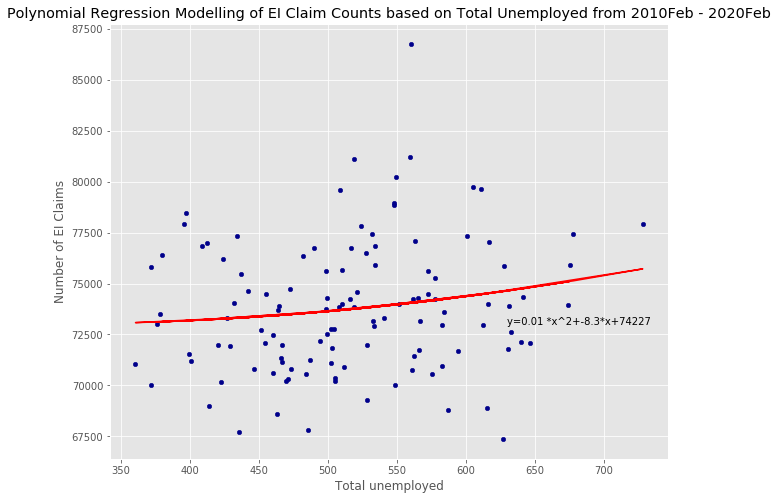

In [11]:
df_reg.plot(kind='scatter', x='Total unemployed', y='EI Claim Counts', figsize=(10, 8), color='darkblue')

plt.title('Polynomial Regression Modelling of EI Claim Counts based on Total Unemployed from 2010Feb - 2020Feb')
plt.xlabel('Total unemployed')
plt.ylabel('Number of EI Claims')

# plot line of best fit
plt.plot(x, fit[0] *x*x + fit[1]*x+fit[2], color='red') 
plt.annotate('y={0:.2f} *x^2+{1:.1f}*x+{2:.0f}'.format(fit[0], fit[1],fit[2]), xy=(630, 73000))


# print out the line of best fit
'EI Claim Counts = {0:.2f} * Total Unemployed^2+ {1:.1f} * Total Unemployed+{2:.0f}'.format(fit[0], fit[1], fit[2])

In [12]:
x=df.iloc[120,6]
EI_CC_Hat_2020Mar=fit[0] * x*x + fit[1]*x+fit[2]
EI_CC_Hat_2020Mar
print(x)
print(EI_CC_Hat_2020Mar)

614.0
74487.96840266735


## Modelling with Adjusted Dataset

In [13]:
# Read the downloaded  file by its local path , and assign it to variable "df"
df = pd.read_csv(r"C:\Users\e78202\Desktop\projects\Coursera_Capstone\EI_Ontario_adj.csv", header= 0)
df.tail(5)
df_reg=df.dropna()
df_reg.head()

,Year,Month,Quarter,Year_Month,Year_Quarter,Date,Total unemployed,Future job starter,On temporary layoff,Looked for full-time work,Looked for part-time work,EI Claim Counts
0,2017,1,1,20171,2017Q1,1/1/2017,486.0,9.7,19.3,302.0,154.9,72790.0
1,2017,2,1,20172,2017Q1,2/1/2017,469.4,11.1,23.8,298.7,135.9,74620.0
2,2017,3,1,20173,2017Q1,3/1/2017,504.5,20.9,22.2,320.9,140.5,70370.0
3,2017,4,2,20174,2017Q2,4/1/2017,442.4,23.0,16.4,294.5,108.5,70320.0
4,2017,5,2,20175,2017Q2,5/1/2017,505.0,19.7,8.4,350.2,126.7,73740.0


In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(360, 525, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for EI Claim Counts ~ Total Unemplpyed')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('EI Claim Counts')
    plt.ylim(ymax=98000,ymin=50000)
    
    plt.show()
    plt.close()

In [16]:
x = df_reg['Total unemployed']      
y = df_reg['EI Claim Counts']
f = np.polyfit(x, y, 2)
p = np.poly1d(f)

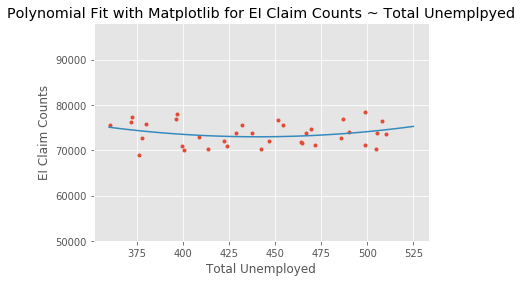

        2
0.3234 x - 285.1 x + 1.358e+05


In [17]:
PlotPolly(p, x, y, 'Total Unemployed')
print(p)

In [19]:
# Read the downloaded  file by its local path , and assign it to variable "df"
df = pd.read_csv(r"C:\Users\e78202\Desktop\projects\Coursera_Capstone\EI_Ontario.csv", header= 0)
Mar=df.iloc[120,6]
Feb=df.iloc[119,6]
Jan=df.iloc[118,6]

EI_CC_Hat_2020Mar_adj=p(Jan)
EI_CC_Hat_2020Apr_adj=p(Feb)
EI_CC_Hat_2020May_adj=p(Mar)
print(EI_CC_Hat_2020Mar_adj)
print(EI_CC_Hat_2020Apr_adj)
print(EI_CC_Hat_2020May_adj)

73222.52136192619
72974.88619918334
82667.52655657055
